<a href="https://colab.research.google.com/github/shivansh-yashasvi/Project-6--SmallTalks-End-to-End-Encrypted-Summarizer-Chat/blob/main/text_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
DOCUMENT = """
While everyone recognize that Instant Messaging is used most by adolescents around the world, there seem to be talks on how it affects a student life on academics. 
Parents and teachers are becoming concerned by the effects of Instant messaging on the teenagers, who spend on average 31 hours a week online according to a survey done by 
(telegraph), which most of the time is spent chatting with friends on MSN, YOUTUBE and online chat rooms. Not only does IM affect the academic life of student in Universities 
it has even begun to reach into the minds and lifestyle of teenager’s as young as 13 years of age. Most of the students end up wasting their time in unproductive activities 
that have no learning outcomes or benefits. They don’t know that time and tide wait for none. Students take a five-minute break while studying but by the time they return 
it’s already been an hour. Another one is that some students are not serious about time management. They set very high aims for themselves when it comes to studying in a 
fit of catch-up with the syllabus, or like in a lot of cases, just to pass the test the next morning. Pulling an all-nighters and trying to study for long hours without 
taking breaks is also inefficient. This, in fact, is quite a bad practice as one can only concentrate fully for a limited period beyond that our brain stops absorbing any 
information whatsoever. This phenomenon is often termed study burnout. Also, make sure you have all your study essentials next to you before you settle down to study so as 
not to end up wasting time looking for them once you start studying. It is a waste of time to log into social media sites if they are not your top interest. The challenge 
with the young generation is that they can't tell when they become addicts to social media networking. Social media should not become a stumbling block on your road to success.  
It's paramount to spend some time chatting with friends on social issues in life. Hence this is the waste of time which we will like to reduce with our project which has a 
message summarizer in it.
"""

# Text Wrangling

In [ ]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

In [ ]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

Parents and teachers are becoming concerned by the effects of Instant messaging on the teenagers, who spend on average 31 hours a week online according to a survey done by (telegraph), which most of the time is spent chatting with friends on MSN, YOUTUBE and online chat rooms.
Students take a five-minute break while studying but by the time they return it’s already been an hour.
It is a waste of time to log into social media sites if they are not your top interest.


In [ ]:
import nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


17

In [ ]:
import numpy as np
import re
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['everyone recognize instant messaging used adolescents around world seem talks affects student life academics',
       'parents teachers becoming concerned effects instant messaging teenagers spend average hours week online according survey done telegraph time spent chatting friends msn youtube online chat rooms',
       'im affect academic life student universities even begun reach minds lifestyle teenagers young years age'],
      dtype='<U193')

# Text Representation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(146, 17)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
absorbing,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.26,0.0,0.0,0.0,0.00,0.0,0.0,0.0
academic,0.00,0.0,0.27,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
academics,0.28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
according,0.00,0.2,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
activities,0.00,0.0,0.00,0.37,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
addicts,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.34,0.0,0.0,0.0
adolescents,0.28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
affect,0.00,0.0,0.27,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
affects,0.28,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0
age,0.00,0.0,0.27,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0


# Latent Semantic Analysis

In [ ]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [ ]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(146, 3) (3,) (3, 17)


In [ ]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [ ]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([0.51401599, 0.6438712 , 0.40669288, 0.53536959, 0.22801584,
       0.45349812, 0.43020918, 0.25540473, 0.33670715, 0.08413097,
       0.34477013, 0.66733788, 0.63905868, 0.67851129, 0.7144672 ,
       0.66494308, 0.3014462 ])

In [ ]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

While everyone recognize that Instant Messaging is used most by adolescents around the world, there seem to be talks on how it affects a student life on academics.
Parents and teachers are becoming concerned by the effects of Instant messaging on the teenagers, who spend on average 31 hours a week online according to a survey done by (telegraph), which most of the time is spent chatting with friends on MSN, YOUTUBE and online chat rooms.
Most of the students end up wasting their time in unproductive activities that have no learning outcomes or benefits.
Also, make sure you have all your study essentials next to you before you settle down to study so as not to end up wasting time looking for them once you start studying.
It is a waste of time to log into social media sites if they are not your top interest.
The challenge with the young generation is that they can't tell when they become addicts to social media networking.
Social media should not become a stumbling block on your road to 

# TextRank

In [ ]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(17, 17)


array([[1.   , 0.084, 0.103, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.072, 0.   ],
       [0.084, 1.   , 0.04 , 0.018, 0.021, 0.018, 0.023, 0.   , 0.047,
        0.   , 0.   , 0.014, 0.02 , 0.   , 0.   , 0.211, 0.019],
       [0.103, 0.04 , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.07 , 0.   , 0.069, 0.   ],
       [0.   , 0.018, 0.   , 1.   , 0.04 , 0.116, 0.147, 0.   , 0.   ,
        0.   , 0.   , 0.185, 0.037, 0.   , 0.   , 0.038, 0.035],
       [0.   , 0.021, 0.   , 0.04 , 1.   , 0.039, 0.05 , 0.   , 0.   ,
        0.   , 0.   , 0.031, 0.043, 0.   , 0.   , 0.045, 0.041],
       [0.   , 0.018, 0.   , 0.116, 0.039, 1.   , 0.146, 0.06 , 0.   ,
        0.   , 0.   , 0.089, 0.036, 0.   , 0.   , 0.038, 0.035],
       [0.   , 0.023, 0.   , 0.147, 0.05 , 0.146, 1.   , 0.   , 0.   ,
        0.092, 0.   , 0.033, 0.046, 0.   , 0.   , 0.048, 0.044],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.06 

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

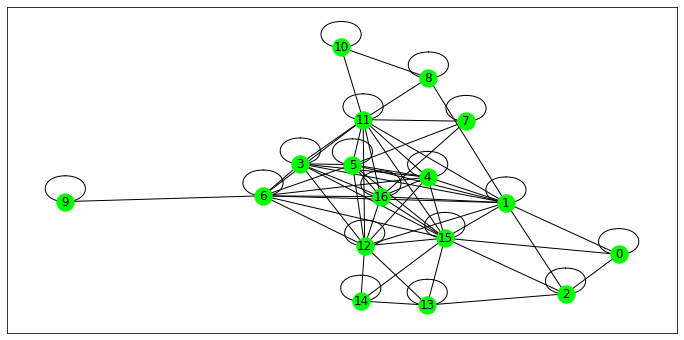

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [ ]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.07096276668374853, 11),
 (0.06915206774482767, 15),
 (0.06670526816668401, 12),
 (0.06279006038232754, 6),
 (0.06075643912073288, 3),
 (0.06019335678256841, 5),
 (0.05906718876720181, 1),
 (0.058789107008228446, 13),
 (0.05763411167745769, 14),
 (0.05740741434982804, 16)]

In [ ]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Parents and teachers are becoming concerned by the effects of Instant messaging on the teenagers, who spend on average 31 hours a week online according to a survey done by (telegraph), which most of the time is spent chatting with friends on MSN, YOUTUBE and online chat rooms.
Most of the students end up wasting their time in unproductive activities that have no learning outcomes or benefits.
Students take a five-minute break while studying but by the time they return it’s already been an hour.
Another one is that some students are not serious about time management.
Also, make sure you have all your study essentials next to you before you settle down to study so as not to end up wasting time looking for them once you start studying.
It is a waste of time to log into social media sites if they are not your top interest.
The challenge with the young generation is that they can't tell when they become addicts to social media networking.
It's paramount to spend some time chatting with frie